## Clone Repo

In [2]:
!git clone https://github.com/ktnguyen17/Deep_White_Balance.git

Cloning into 'Deep_White_Balance'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 139 (delta 15), reused 1 (delta 0), pack-reused 112
Receiving objects: 100% (139/139), 105.49 MiB | 22.18 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Checking out files: 100% (81/81), done.


## Download Data

In [3]:
!pip3 install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1p8X-328dHw0KxkEgKfUHiDd-sV1e0kKV/view?usp=sharing -O /content/

Downloading...
From: https://drive.google.com/uc?id=1p8X-328dHw0KxkEgKfUHiDd-sV1e0kKV
To: /content/Set1_input_images_wo_CC_JPG.zip
100% 4.84G/4.84G [00:49<00:00, 96.8MB/s]


In [ ]:
!unzip -jn /content/Set1_input_images_wo_CC_JPG.zip -d /content/Deep_White_Balance/dataset/ 

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/14unOOHymHrMudlRclp5YVjc7RDbXw7qO/view?usp=share_link -O /content/

Downloading...
From: https://drive.google.com/uc?id=14unOOHymHrMudlRclp5YVjc7RDbXw7qO
To: /content/Set1_ground_truth_images_wo_CC.zip
100% 1.67G/1.67G [00:21<00:00, 76.2MB/s]


In [ ]:
!unzip -jn /content/Set1_ground_truth_images_wo_CC.zip -d /content/Deep_White_Balance/dataset/

In [ ]:
%cd /content/Deep_White_Balance/dataset/

/content/Deep_White_Balance/dataset


In [ ]:
!for file in *.jpg; do mv "$file" "${file%.jpg}.png"; done

In [ ]:
!ls | wc -l

64526


## Training

In [ ]:
%cd /content/Deep_White_Balance/PyTorch/

/content/Deep_White_Balance/PyTorch


In [ ]:
!CUDA_VISIBLE_DEVICE=0 python train.py --training_dir ../dataset/ --epochs 50 --learning-rate-drop-period 50 --load /content/Deep_White_Balance/PyTorch/models/net_wb.pth

INFO: Training of Deep White-Balance Editing
INFO: Using device cuda
INFO: Model loaded from /content/Deep_White_Balance/PyTorch/models/net_wb.pth
INFO: Training process will use 13333 training images randomly selected from folds [2, 3]
INFO: Loading training images information...
INFO: Creating dataset with 13333 examples
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: NumExpr defaulting to 2 threads.
INFO: Starting training:
        Epochs:          50 epochs
        Batch size:      32
        Patch size:      128 x 128
        Patches/image:   4
        Lear

## Inferencing

In [ ]:
%cd /content/Deep_White_Balance/example_images/
!for file in *.JPG; do mv "$file" "${file%.JPG}.jpg"; done
%cd /content/Deep_White_Balance/PyTorch

/content/Deep_White_Balance/example_images
/content/Deep_White_Balance/PyTorch


In [ ]:
!mkdir /content/Deep_White_Balance/result_images

In [ ]:
# !python demo_single_image.py --input ../example_images/05.jpg --output_dir ../result_images --show

INFO: Using device cuda
INFO: Loading model ./models/net_wb.pth
INFO: Models loaded !
INFO: Processing image ../example_images/05.jpg ...
INFO: Visualizing result for image: ../example_images/05.jpg, close to continue ...
Figure(640x480)


In [ ]:
# !rm /content/Deep_White_Balance/result_images/*

In [ ]:
!python demo_images.py --input_dir ../example_images/ --output_dir ../result_images

INFO: Using device cuda
INFO: Loading model ./models/net_wb.pth
INFO: Using device cuda
INFO: Processing image ../example_images/09.jpg ...
INFO: Processing image ../example_images/08.jpg ...
INFO: Processing image ../example_images/05.jpg ...
INFO: Processing image ../example_images/07.JPG ...
INFO: Processing image ../example_images/10.jpg ...
INFO: Processing image ../example_images/02.jpg ...
INFO: Processing image ../example_images/11.jpg ...
INFO: Processing image ../example_images/01.jpg ...
INFO: Processing image ../example_images/06.jpg ...
INFO: Processing image ../example_images/03.jpg ...
INFO: Processing image ../example_images/12.jpg ...
INFO: Processing image ../example_images/00.JPG ...
INFO: Processing image ../example_images/04.jpg ...


In [ ]:
!rm -rf /content/Deep_White_Balance/example_images/.ipynb_checkpoints/

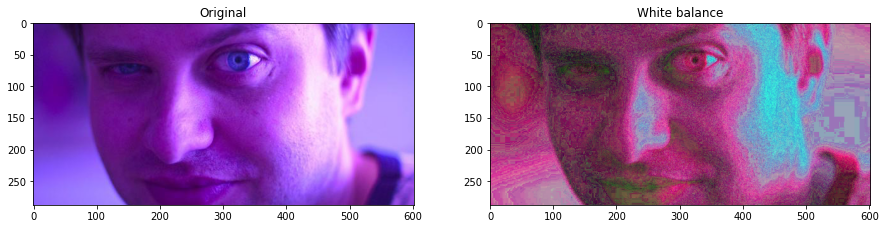

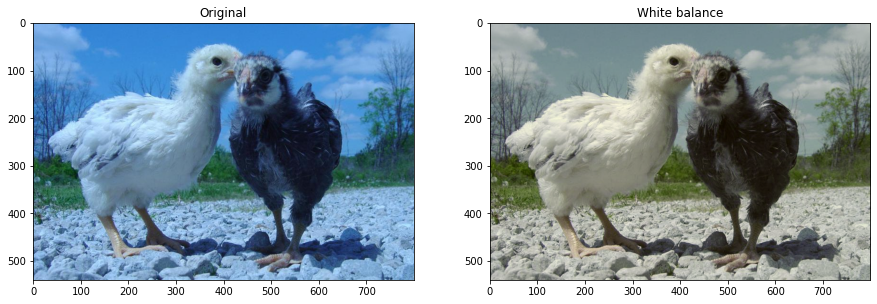

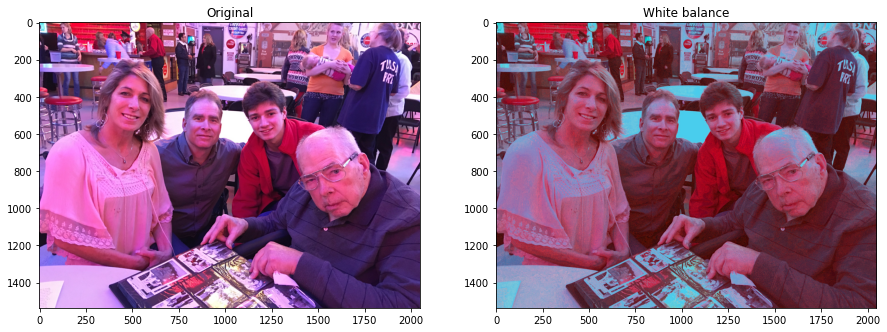

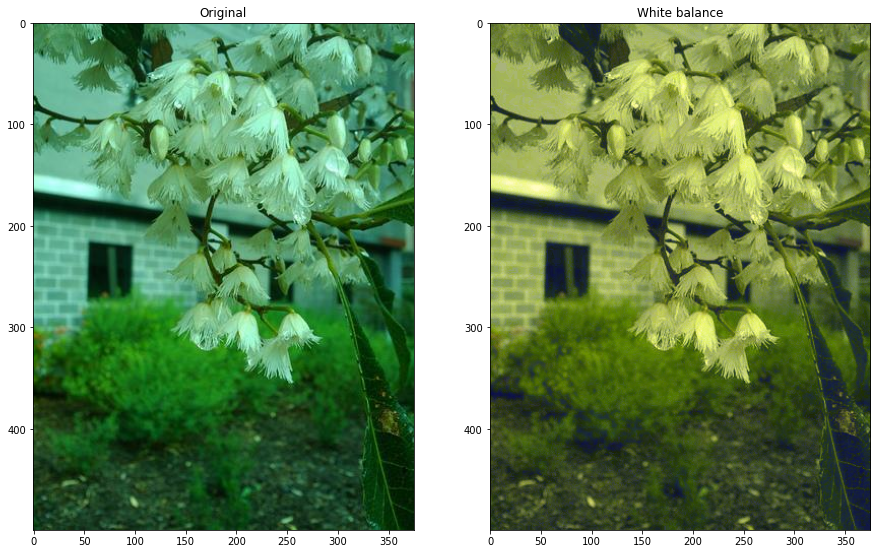

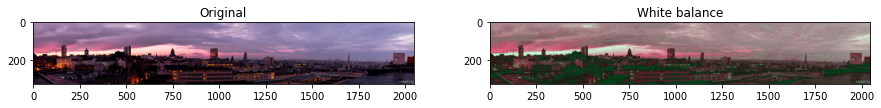

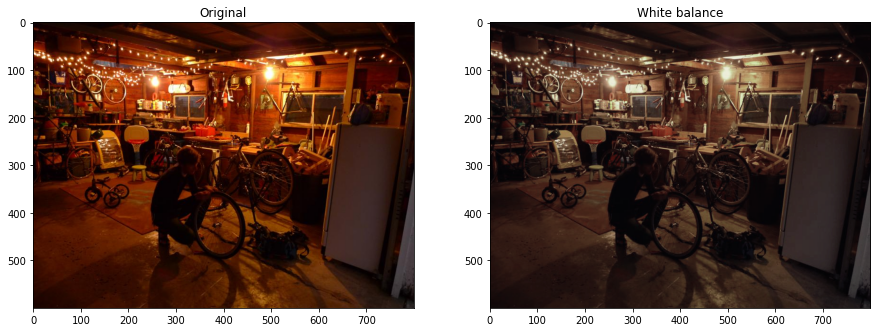

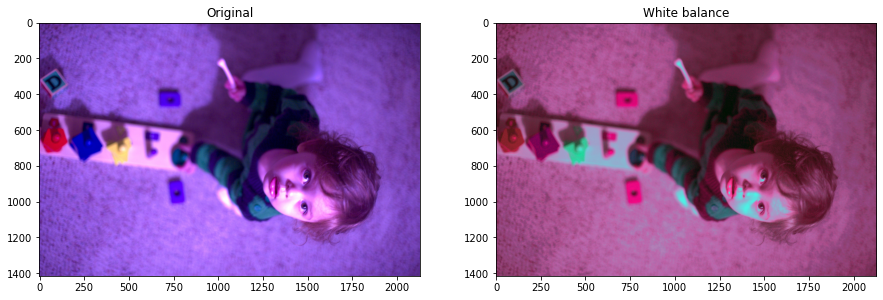

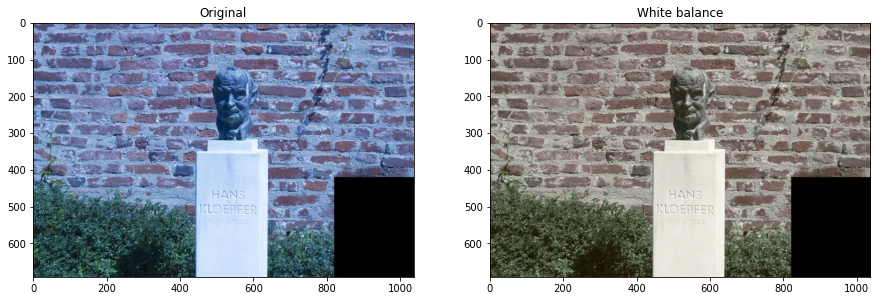

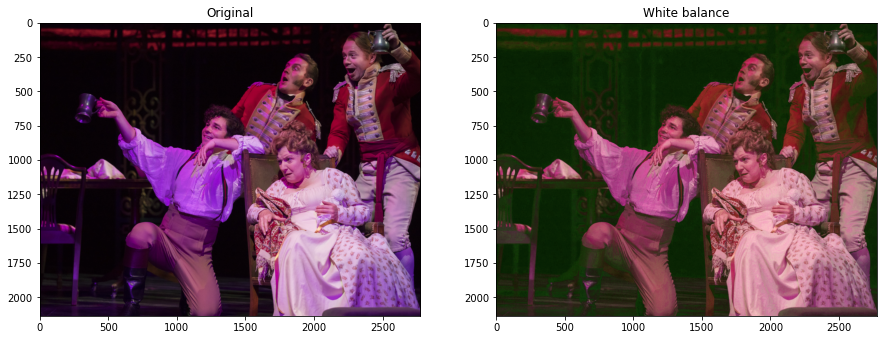

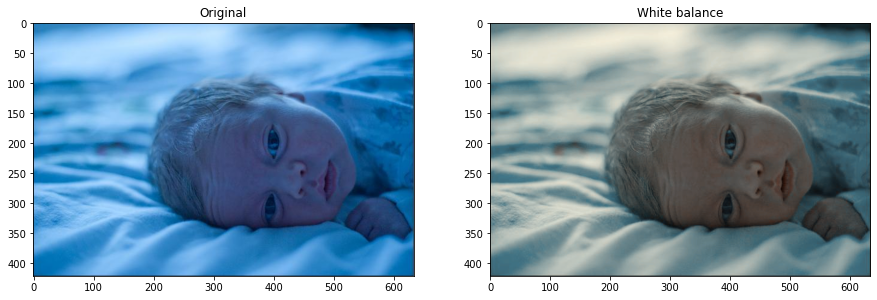

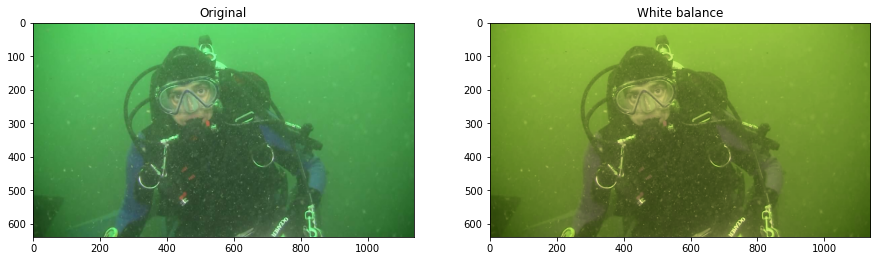

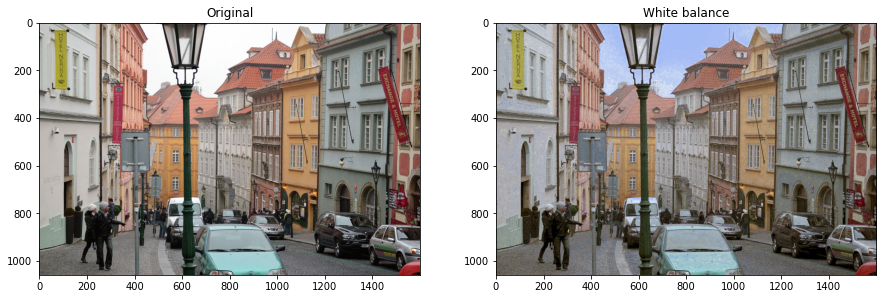

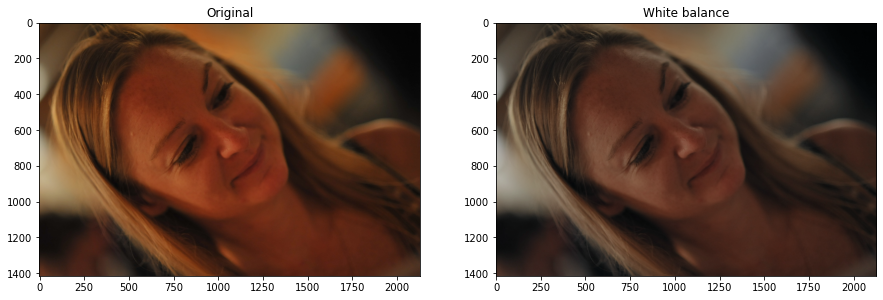

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(30,80))
plt.suptitle('Show White Balance Results')

for filename in os.listdir('/content/Deep_White_Balance/example_images/'):
    # if i < 10:
    #     imname = '0' + str(i)
    # else:
    #     imname = str(i)
    imname = filename.split('.')[0]

    orgpath = '/content/Deep_White_Balance/example_images/' + imname + '.jpg'
    org = cv2.imread(orgpath)
    RGB_org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)

    path = '/content/Deep_White_Balance/result_images/' + imname + '_AWB.png' 
    img = cv2.imread(path)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plt.figure(figsize = (15,10))

    plt.subplot(1,2,1)
    plt.imshow(RGB_org)
    plt.title('Original')


    plt.subplot(1,2,2)
    plt.imshow(RGB_img)
    plt.title('White balance')

    plt.show()